<a href="https://colab.research.google.com/github/NandhanaRameshkumar/Object-recognition/blob/main/Object_recognition_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted template index: 1
Similarity score: 33.98%


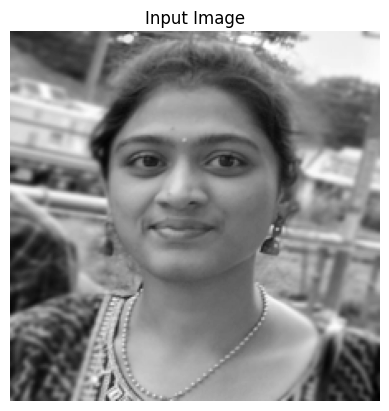

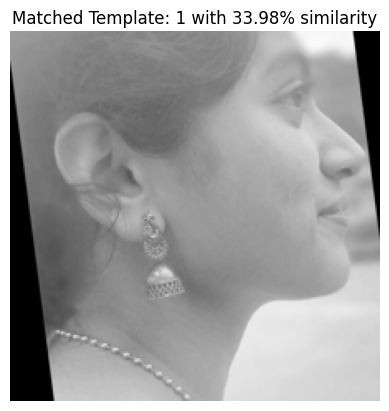

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to a standard size
    img = img.convert('L')  # Convert to grayscale
    img = np.array(img) / 255.0  # Normalize the image
    return img

def display_image(image, title='Image'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def classify_image(image, templates):
    errors = [calculate_mse(image, template) for template in templates]
    min_error_index = np.argmin(errors)
    min_error = errors[min_error_index]
    return min_error_index, min_error

def similarity_score(mse, max_mse=0.1):
    return max(0, (1 - mse / max_mse)) * 100

image_path = 'Beauty.jpg'
template_paths = ['Nandhu.jpg', 'Gorg.jpg', 'Twin.jpg']
image = load_and_preprocess_image(image_path)
templates = [load_and_preprocess_image(path) for path in template_paths]

predicted_index, min_error = classify_image(image, templates)
similarity = similarity_score(min_error)

print(f'Predicted template index: {predicted_index}')
print(f'Similarity score: {similarity:.2f}%')

display_image(image, 'Input Image')
display_image(templates[predicted_index], f'Matched Template: {predicted_index} with {similarity:.2f}% similarity')
